# Raw data EDA

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import geopandas as gpd
import pandas as pd
from pathlib import Path
import rasterio

import nasa_hls

from src import configs
prjconf = configs.ProjectConfigParser()
tilenames = prjconf.get("Params", "tiles").split(" ")
tilenames

['32UNU', '32UPU', '32UQU', '33UUP']

### CLC

#### Raster

In [2]:
path__clc = prjconf.get_path("Raw", "clc")
with rasterio.open(path__clc) as src:
    clc_meata = src.meta
clc_meata

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 65000,
 'height': 46000,
 'count': 1,
 'crs': CRS.from_epsg(3035),
 'transform': Affine(100.0, 0.0, 900000.0,
        0.0, -100.0, 5500000.0)}

#### Legend

In [3]:
path__clc_legend = prjconf.get_path("Raw", "clc_legend")
clc_legend = pd.read_csv(path__clc_legend)
clc_legend

,name_l1,name_l2,name_l3,grid_code,rgb,cid_l1,cid_l2,cid_l3
0,ARTIFICIAL SURFACES,Urban fabric,Continuous urban fabric,1,230-000-077,1,11,111
1,ARTIFICIAL SURFACES,Urban fabric,Discontinuous urban fabric,2,255-000-000,1,11,112
2,ARTIFICIAL SURFACES,"Industrial, commercial and transport units",Industrial or commercial units,3,204-077-242,1,12,121
3,ARTIFICIAL SURFACES,"Industrial, commercial and transport units",Road and rail networks and associated land,4,204-000-000,1,12,122
4,ARTIFICIAL SURFACES,"Industrial, commercial and transport units",Port areas,5,230-204-204,1,12,123
5,ARTIFICIAL SURFACES,"Industrial, commercial and transport units",Airports,6,230-204-230,1,12,124
6,ARTIFICIAL SURFACES,"Mine, dump and construction sites",Mineral extraction sites,7,166-000-204,1,13,131
7,ARTIFICIAL SURFACES,"Mine, dump and construction sites",Dump sites,8,166-077-000,1,13,132
8,ARTIFICIAL SURFACES,"Mine, dump and construction sites",Construction sites,9,255-077-255,1,13,133
9,ARTIFICIAL SURFACES,"Artificial, non-agricultural vegetated areas",Green urban areas,10,255-166-255,1,14,141


### Tile grid and footprints

#### Grid

So far, this is not to be used in later steps. It can be read as follows.

```python
path__tile_grid = prjconf.get_path("Raw", "tile_grid")
gpd.read_file(path__tiles_grid)
```

#### Footprints

/home/ben/Devel/Projects/classify-hls/data/raw/footprints/tiles/footprint_32UNU.gpkg
/home/ben/Devel/Projects/classify-hls/data/raw/footprints/tiles/footprint_32UPU.gpkg
/home/ben/Devel/Projects/classify-hls/data/raw/footprints/tiles/footprint_32UQU.gpkg
/home/ben/Devel/Projects/classify-hls/data/raw/footprints/tiles/footprint_33UUP.gpkg


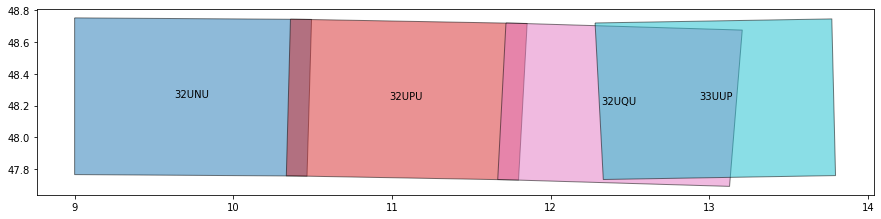

In [4]:
tile_footprints = prjconf.get_footprints()
ax = tile_footprints.plot(column="name", alpha=.5, edgecolor='black', figsize=(15, 8))
tile_footprints.apply(lambda x: ax.annotate(s=x["name"], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

### HLS

In [66]:
hls_lut = []
for tile in tilenames:
    path__hls_tile_lut = prjconf.get_path("Raw", "hls_tile_lut", tile=tile)
    hls_lut.append(pd.read_csv(path__hls_tile_lut))
hls_lut = pd.concat(hls_lut)
hls_lut

,path,sceneid,product,tile,date_Yj,date,cloud_cover,spatial_coverage
0,/home/ben/Devel/Projects/classify-hls/data/raw...,HLS.L30.T32UNU.2018035.v1.4,L30,32UNU,2018035,2018-02-04,86.0,100.0
1,/home/ben/Devel/Projects/classify-hls/data/raw...,HLS.L30.T32UNU.2018346.v1.4,L30,32UNU,2018346,2018-12-12,95.0,40.0
2,/home/ben/Devel/Projects/classify-hls/data/raw...,HLS.L30.T32UNU.2018074.v1.4,L30,32UNU,2018074,2018-03-15,100.0,37.0


**TODO: Some counting, aggregation, plots, when everything is downloaded ...***